<a href="https://colab.research.google.com/github/adplays21/mlproj.github.io/blob/main/humanbrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[]

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


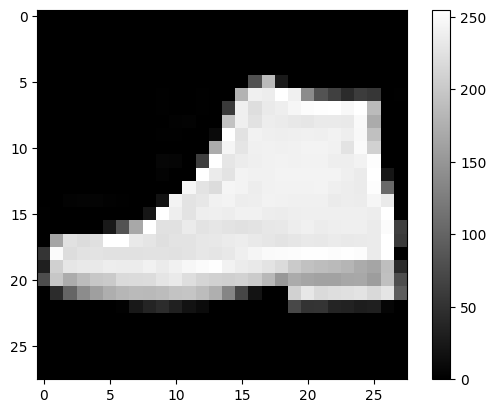

In [ ]:
import matplotlib.pyplot as plt


data_idx = 42

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_labels[data_idx]

9

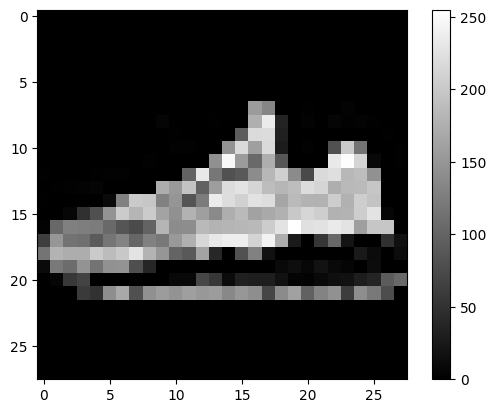

In [ ]:
import matplotlib.pyplot as plt
|
data_idx = 6174

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
valid_labels[data_idx]

7

In [ ]:
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

7840

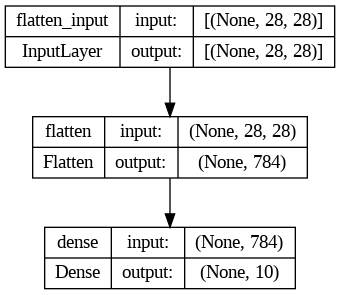

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 16.5682 - accuracy: 0.7461 - val_loss: 10.3014 - val_accuracy: 0.7968
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 12.4556 - accuracy: 0.7867 - val_loss: 13.1834 - val_accuracy: 0.7623
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 11.7950 - accuracy: 0.7934 - val_loss: 12.7696 - val_accuracy: 0.7923
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 10.8969 - accuracy: 0.8008 - val_loss: 11.2459 - val_accuracy: 0.8003
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 10.5815 - accuracy: 0.8035 - val_loss: 10.7503 - val_accuracy: 0.7923


In [ ]:
model.predict(train_images[0:10])

1/1 [==============================] - 0s 145ms/step


array([[ -298.38437  ,  -545.5586   ,  -154.20363  ,  -237.16241  ,
         -343.33652  ,   358.77023  ,   -34.496887 ,   277.72266  ,
           76.28626  ,   760.7381   ],
       [  299.5064   ,  -279.24274  ,   198.30125  ,   142.4787   ,
         -115.88961  , -1343.6372   ,   221.84448  , -2015.5951   ,
          -43.730278 ,  -914.4313   ],
       [   74.02689  ,    19.08198  ,    65.029366 ,   114.93637  ,
           64.05992  ,  -512.051    ,    65.956566 ,  -512.83044  ,
          -27.940594 ,  -258.4405   ],
       [  137.6899   ,    42.446213 ,   150.38107  ,   160.79807  ,
           56.05865  ,  -842.86456  ,   137.14896  , -1147.5944   ,
          -62.431915 ,  -621.00507  ],
       [  200.74562  ,   213.95726  ,   139.16747  ,   260.6032   ,
          153.85155  ,  -959.5044   ,   123.992775 ,  -871.84283  ,
           96.32308  ,  -734.9889   ],
       [  166.13228  ,   -36.877632 ,   335.7256   ,   140.47874  ,
          208.24724  ,  -806.30255  ,   221.17715  , -167

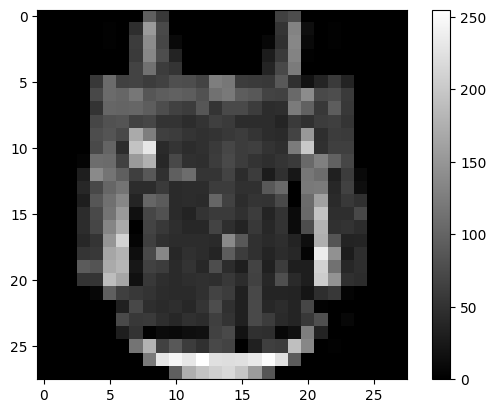

1/1 [==============================] - 0s 48ms/step


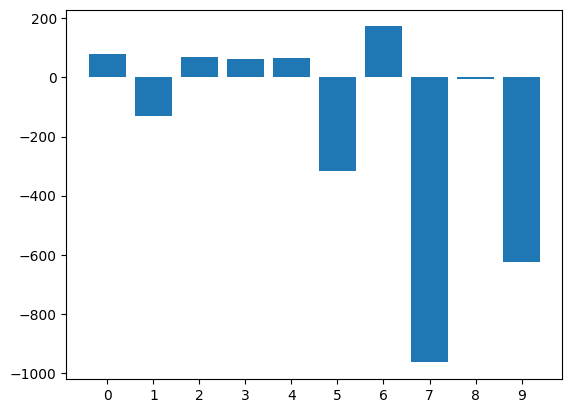

correct answer: 6


In [ ]:
data_idx = 8675 # The question number to study with. Feel free to change up to 59999.

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])

In [ ]:
#hence,we are done with creating a human brain and then checking it's maximum accuracy at an extent.